## **Importing the libraries required**

In [1]:
# Importing the basic libraries we will require for the project

import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
import csv,json;
import os;

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn import tree;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.ensemble import RandomForestClassifier;

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV;
from sklearn.metrics import recall_score, roc_curve, classification_report, confusion_matrix;
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder;
from sklearn.compose import ColumnTransformer;
from sklearn.impute import SimpleImputer;
from sklearn.pipeline import Pipeline;
from sklearn import metrics, model_selection;

# Setting the random seed to 1 for reproducibility of results
import random;
random.seed(1);
np.random.seed(1);

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
df_astro = pd.read_csv('Skyserver250k.csv');
df_astro.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237661976015274033,196.362072,7.667016,19.32757,19.20759,19.16249,19.07652,18.86196,3842,301,4,102,2020027785916999680,QSO,1.984419,1794,54504,594
1,1237661362373066810,206.614664,45.924279,18.95918,17.09173,16.25019,15.83413,15.55686,3699,301,5,121,1649585252231833600,GALAXY,0.064456,1465,53082,516
2,1237661360767238272,220.294728,40.894575,17.75587,16.54700,16.67694,16.77780,16.88097,3699,301,2,194,3812387877359296512,STAR,-0.000509,3386,54952,330
3,1237665440983416884,206.315349,27.438152,19.29195,19.12720,19.03992,18.76714,18.73874,4649,301,2,152,6762291282364878848,QSO,1.882893,6006,56105,496
4,1237665531717812262,228.092653,20.807371,19.19731,18.26143,17.89954,17.76130,17.68726,4670,301,3,201,4454292673071960064,STAR,-0.000295,3956,55656,846


In [3]:
df_astro = df_astro.sample(n=50000)

In [4]:
# Checking for any missing values just in case
df_astro.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [5]:
# Let's also check for duplicate rows in the dataset
df_astro.duplicated().sum()

0

In [6]:
### Percentage class distribution of the target variable "class"
df_astro['class'].value_counts(1)*100

GALAXY    51.074
STAR      38.368
QSO       10.558
Name: class, dtype: float64

In [7]:
le = LabelEncoder()
df_astro["class"] = le.fit_transform(df_astro["class"])
df_astro["class"] = df_astro["class"].astype(int)

In [8]:
# We would like the format of the values in the table to be simple float numbers with 5 decimal places, hence the code below
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Let's view the statistical summary of the columns in the dataset
df_astro.describe().T

,count,mean,std,min,25%,50%,75%,max
objid,50000.00000,1237662592402716928.00000,7207093862089.52148,1237645942905438464.00000,1237657629514236160.00000,1237662268074393856.00000,1237667211599904768.00000,1237680530812895744.00000
ra,50000.00000,178.38919,77.87886,0.01518,138.12116,181.08311,224.55207,359.99357
dec,50000.00000,24.46484,20.08817,-19.50182,6.84518,23.12350,39.70158,84.79483
u,50000.00000,18.63623,0.82798,11.41754,18.20821,18.86979,19.26691,19.59998
g,50000.00000,17.40655,0.98268,9.66834,16.84567,17.51230,18.05566,19.99148
r,50000.00000,16.88019,1.12646,9.05049,16.19581,16.88970,17.58307,31.41264
i,50000.00000,16.62614,1.20586,8.80997,15.86300,16.59721,17.34320,29.09998
z,50000.00000,16.46675,1.27357,9.22884,15.62477,16.42961,17.23214,28.75626
run,50000.00000,3985.58622,1678.04277,109.00000,2830.00000,3910.00000,5061.00000,8162.00000
rerun,50000.00000,301.00000,0.00000,301.00000,301.00000,301.00000,301.00000,301.00000


In [9]:
# Removing the objid and specobjid columns from the dataset
df_astro.drop(columns=['objid', 'specobjid'], inplace=True)

## **Exploratory Data Analysis**
### **Univariate Analysis**
We will first define a **hist_box() function** that provides both a boxplot and a histogram in the same visual, with which we can perform univariate analysis on the columns of this dataset.

In [10]:
# Defining the hist_box() function
def hist_box(col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(15,10))
    sns.set(style='darkgrid')
    # Adding a graph in each part
    sns.boxplot(df_astro[col], ax=ax_box, showmeans=True)
    sns.distplot(df_astro[col], ax=ax_hist)
    ax_hist.axvline(df_astro[col].mean(), color='green', linestyle='--') # Green line corresponds to the mean in the plot
    ax_hist.axvline(df_astro[col].median(), color='orange', linestyle='-') # Orange line corresponds to the median in the plot
    plt.show()

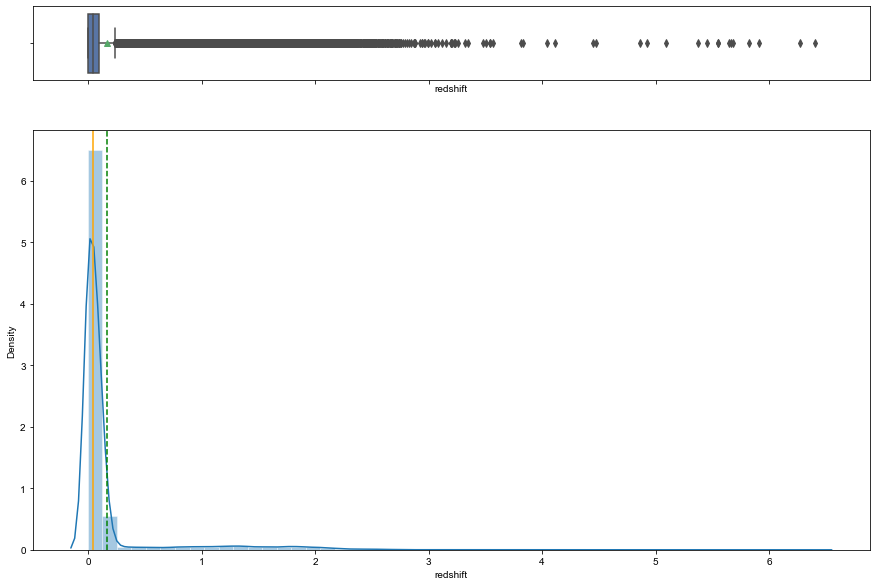

In [11]:
hist_box('redshift')

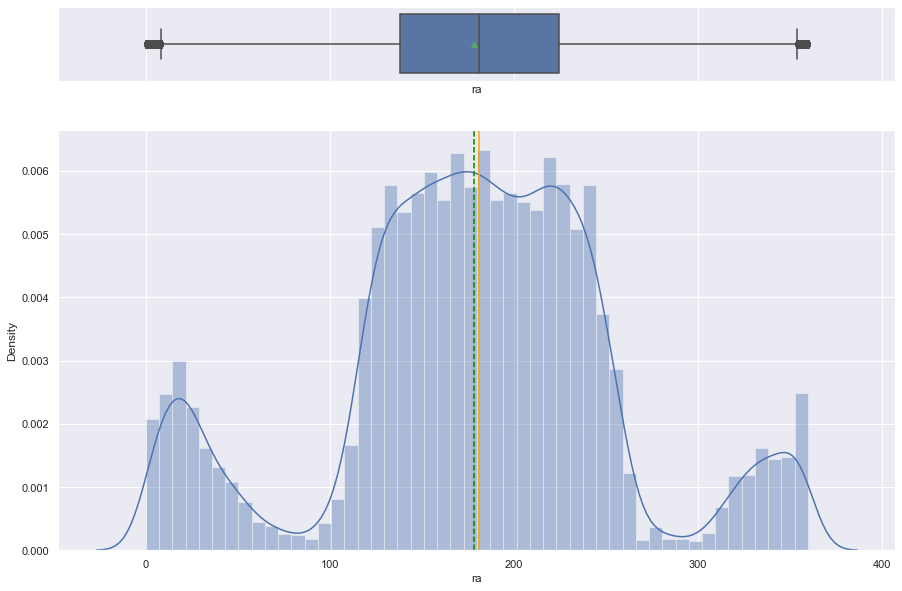

In [12]:
hist_box('ra')

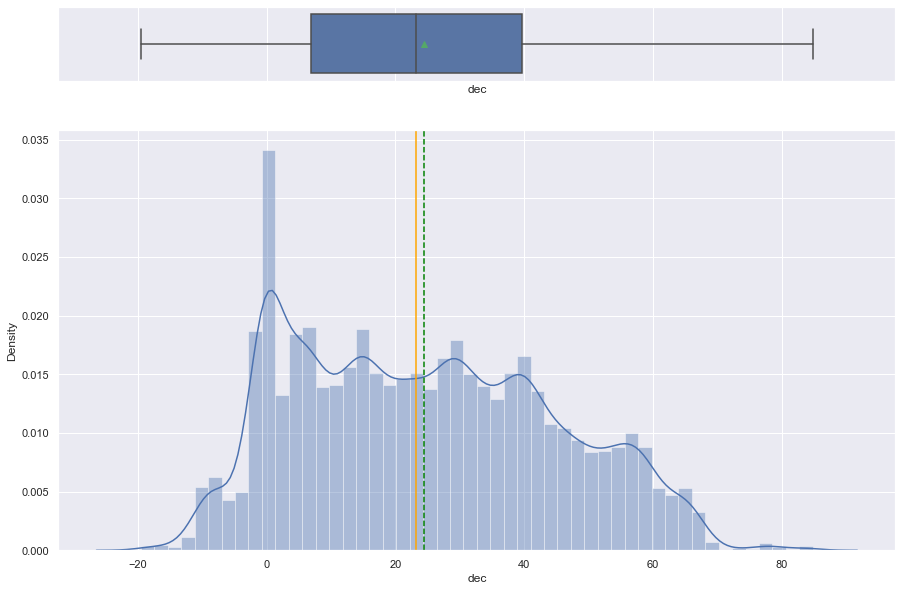

In [13]:
hist_box('dec')

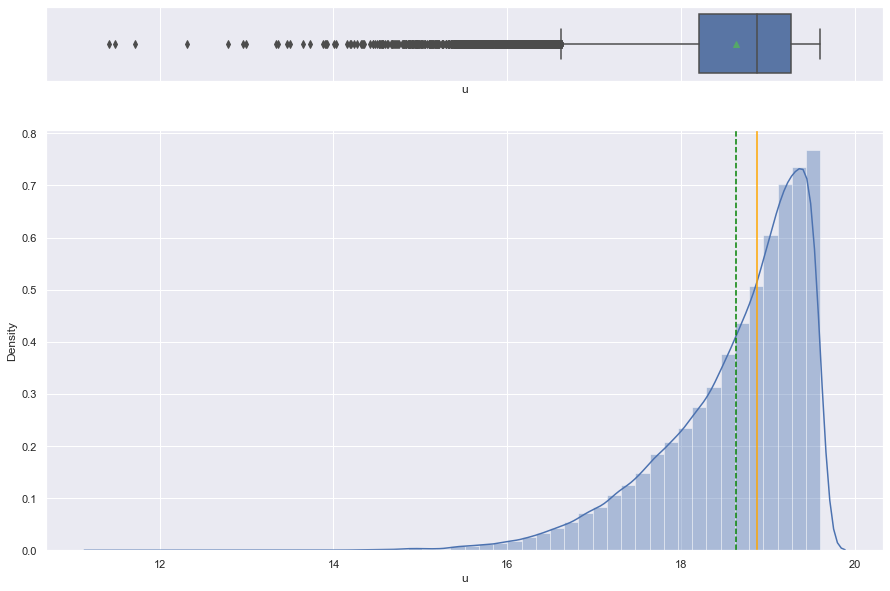

In [14]:
hist_box('u')

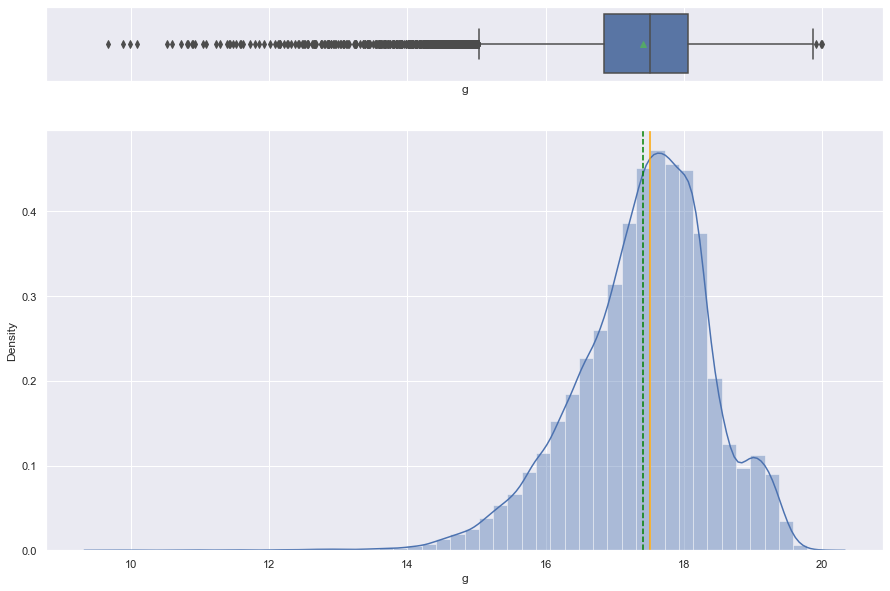

In [15]:
hist_box('g')

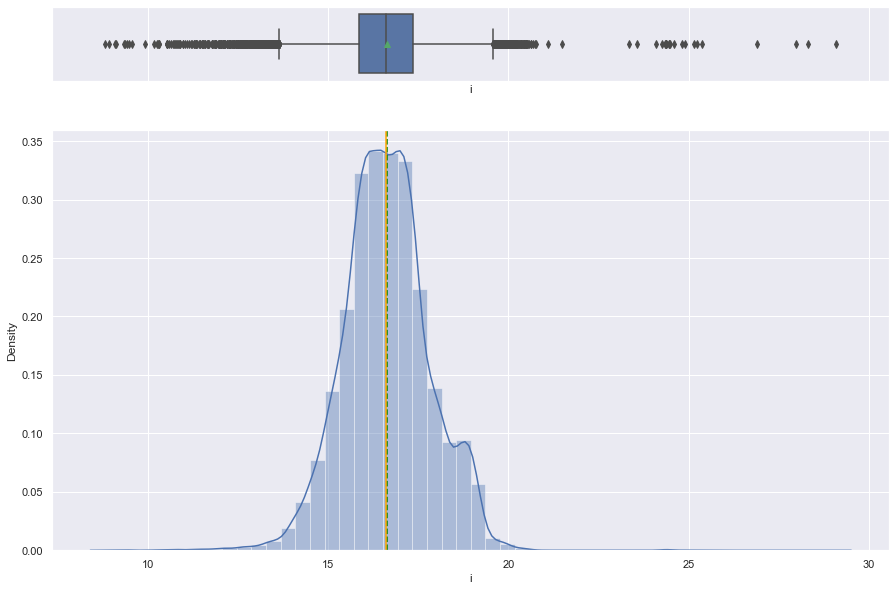

In [16]:
hist_box('i')

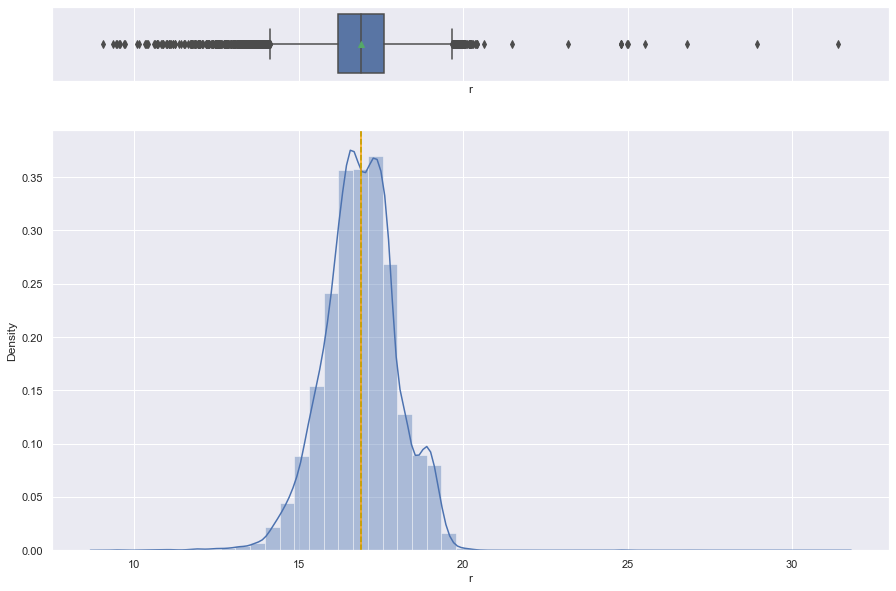

In [17]:
hist_box('r')

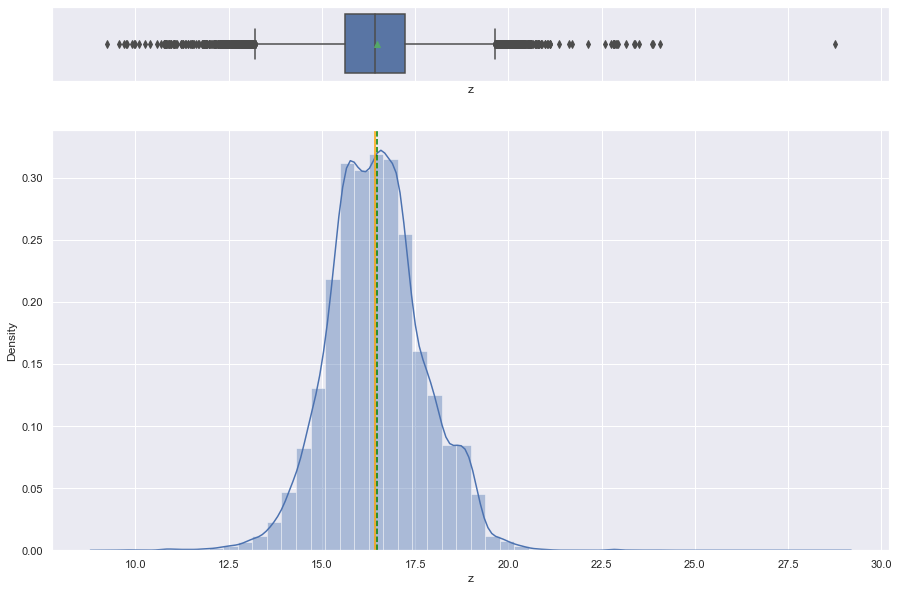

In [18]:
hist_box('z')

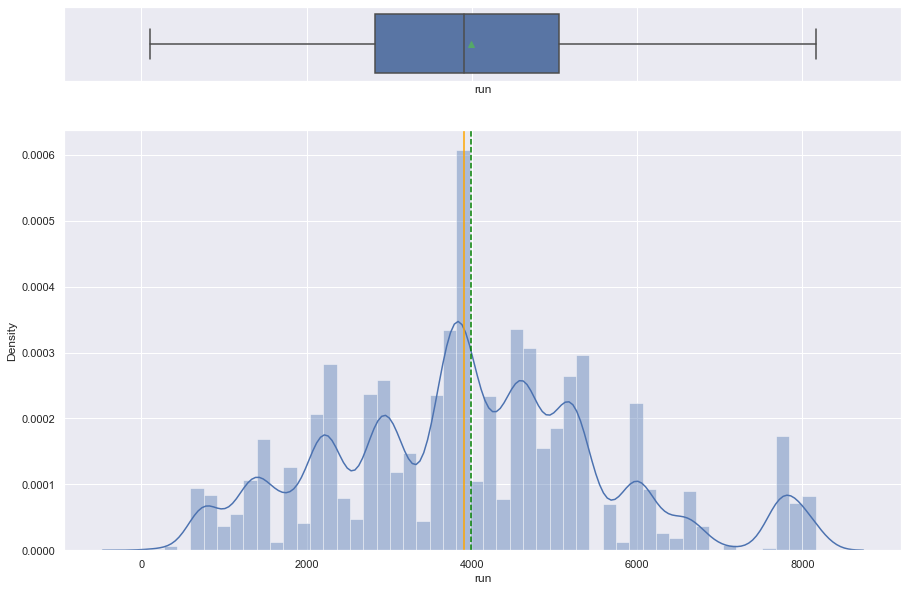

In [19]:
hist_box('run')

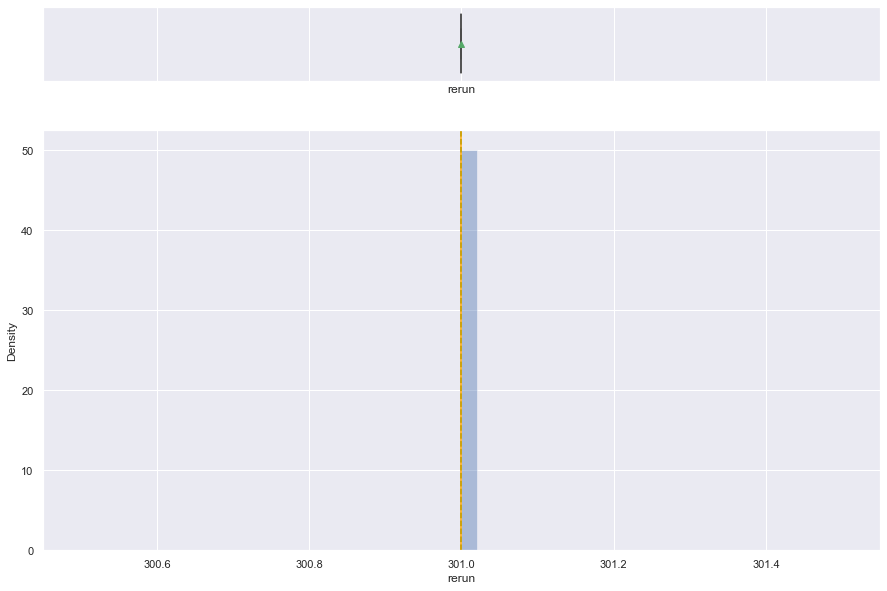

In [20]:
hist_box('rerun')

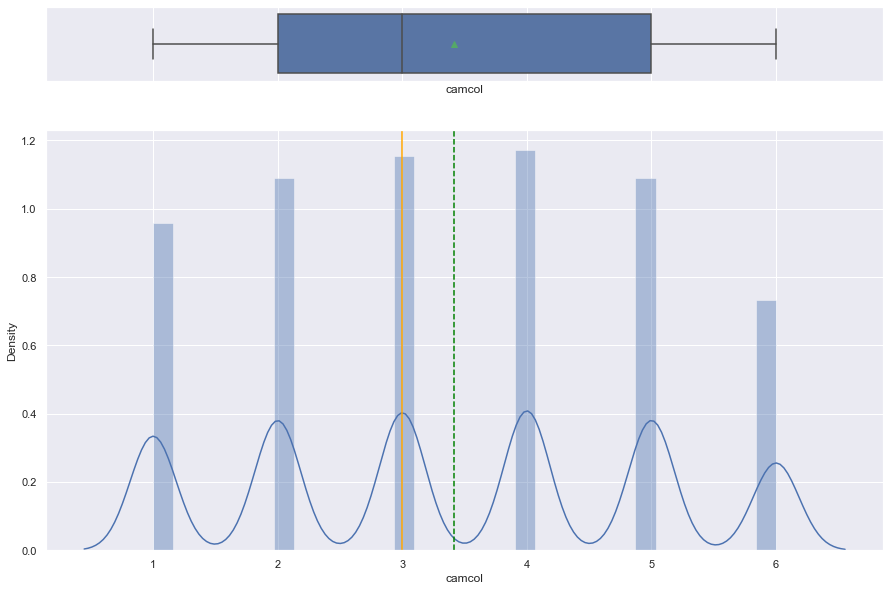

In [21]:
hist_box('camcol')

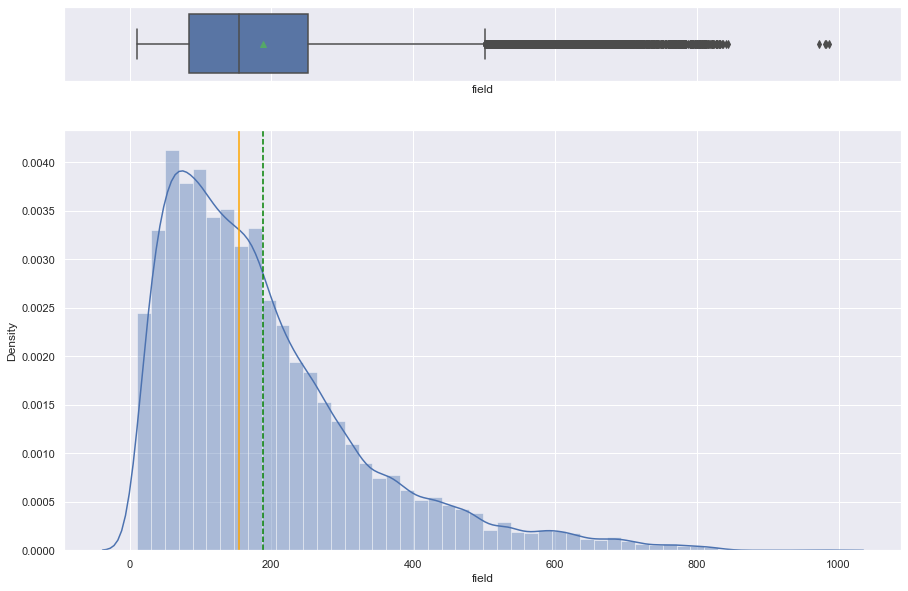

In [22]:
hist_box('field')

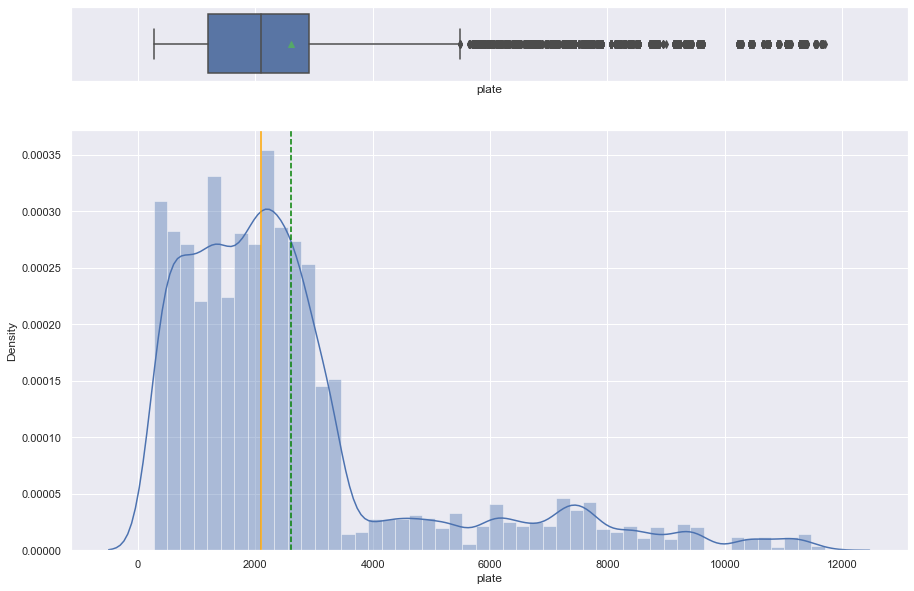

In [23]:
hist_box('plate')

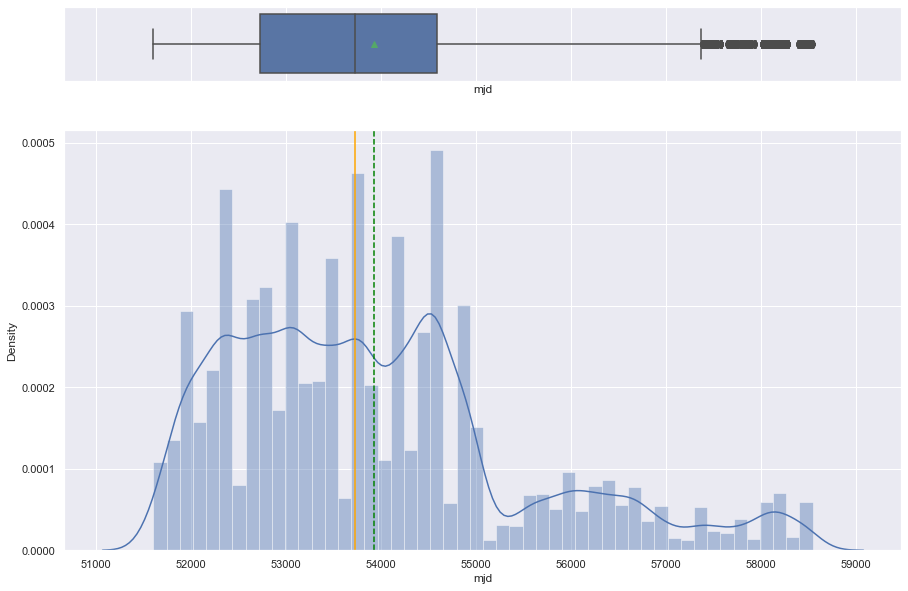

In [24]:
hist_box('mjd')

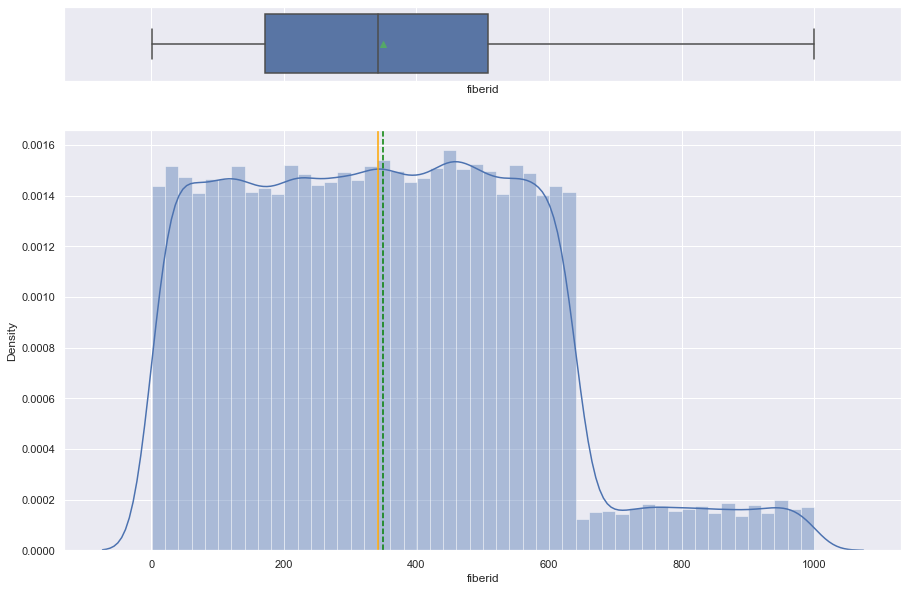

In [25]:
hist_box('fiberid')

**Observations:**
- The distribution plot shows that the plate, field, dec and redhshift variables are **right-skewed.** It is evident from the boxplots that all these variables have outliers.
- The camcol, rerun, run, fiberid and delta are the variables which do not possess outliers in the boxplot.
- rerun is the only variable which has one unique value.
- The variables x, i and r have similar distributions.
- The variables g and u are **slightly left-skewed** distributions.

### **Bivariate Analysis**
#### **Categorical and Continuous variables**

<AxesSubplot:xlabel='class', ylabel='redshift'>

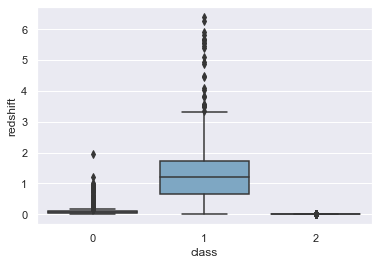

In [26]:
#class vs redshift
sns.boxplot(df_astro['class'],df_astro['redshift'],palette="PuBu")

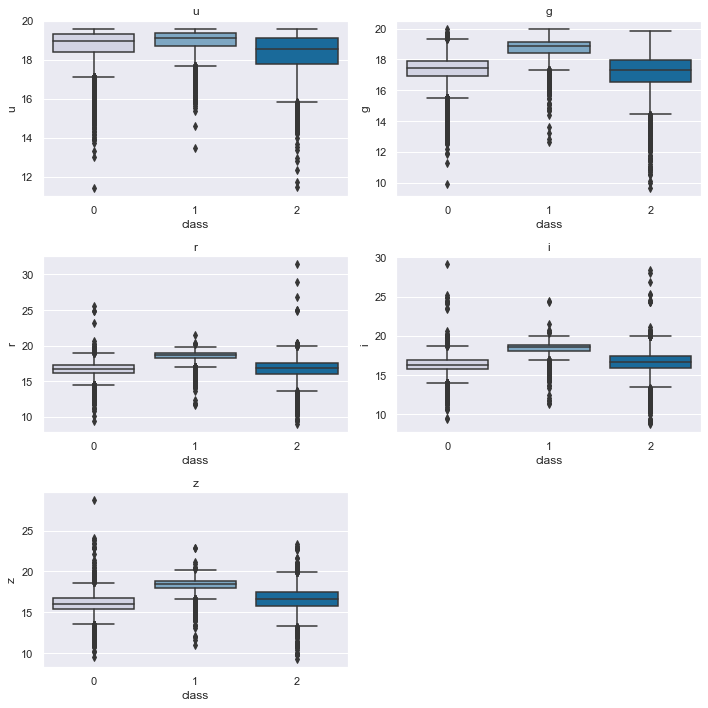

In [27]:
# class vs [u,g,r,i,z]
cols = df_astro[['u','g','r','i','z']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df_astro["class"],df_astro[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

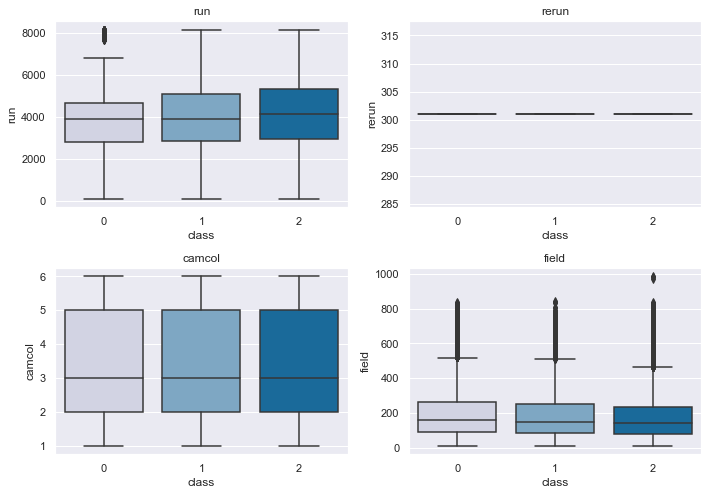

In [28]:
cols = df_astro[['run', 'rerun', 'camcol', 'field']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df_astro["class"],df_astro[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

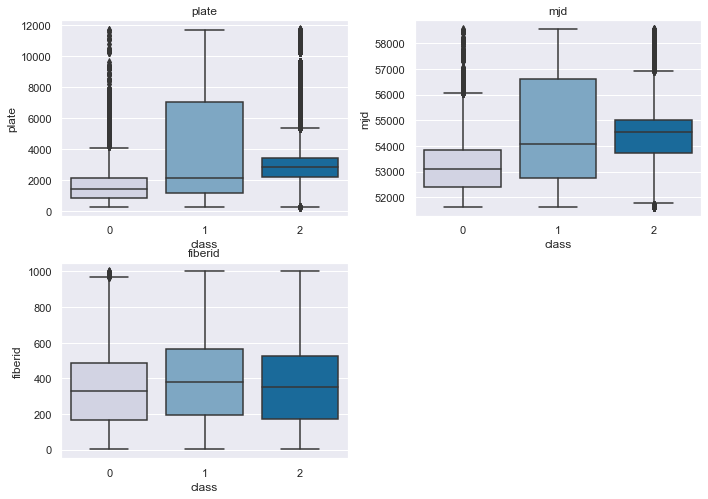

In [29]:
cols = df_astro[['plate', 'mjd', 'fiberid']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df_astro["class"],df_astro[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

#### **kdeplot**
The kdeplot is a graph of the density of a numerical variable.

In [30]:
def plot(column):
    for i in range(3):
        sns.kdeplot(data=df_astro[df_astro["class"] == i][column], label = le.inverse_transform([i]))
    sns.kdeplot(data=df_astro[column],label = ["All"])
    plt.legend();

def log_plot(column):
    for i in range(3):
        sns.kdeplot(data=np.log(df_astro[df_astro["class"] == i][column]), label = le.inverse_transform([i]))
    sns.kdeplot(data=np.log(df_astro[column]),label = ["All"])
    plt.legend();

#### **rerun**
Rerun Number to specify how the image was processed

In [31]:
df_astro["rerun"].nunique()

1

Only one unique value does not help you train a predictive model, so we can drop this column.

In [32]:
df_astro = df_astro.drop("rerun",axis=1)

#### **alpha**
Right Ascension angle (at J2000 epoch)

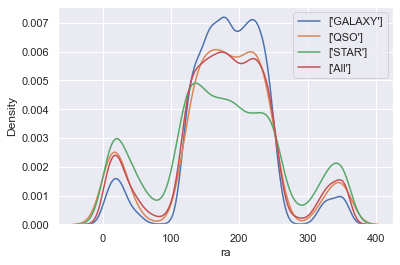

In [34]:
plot("ra")

There is not much difference in the distribution according to class, but we can see that **there are some characteristics that distinguish the STAR class here**.

#### **delta**
Declination angle (at J2000 epoch)

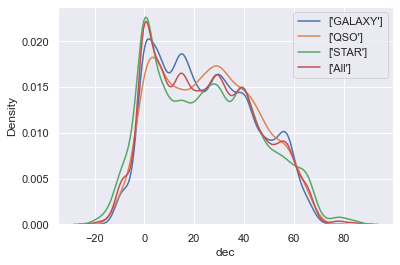

In [36]:
plot("dec")

Although there is no significant difference in distribution according to class, we can see that there are some characteristics to distinguish QSO class.

#### **r**
The red filter in the photometric system

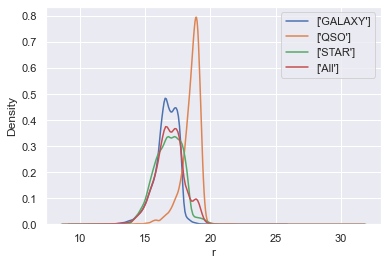

In [37]:
plot("r")

It can be seen that the distribution of the **QSO class** for this variable is characterized by a different pattern from the other categories.

#### **i**
Near Infrared filter in the photometric system

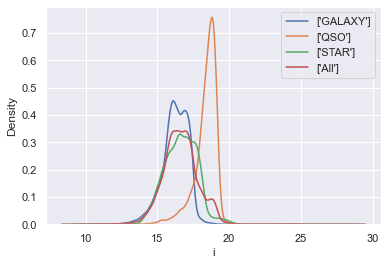

In [39]:
plot("i")

We can see that the distribution of the qso class is a little bit characteristic.

#### **run**
Run Number used to identify the specific scan

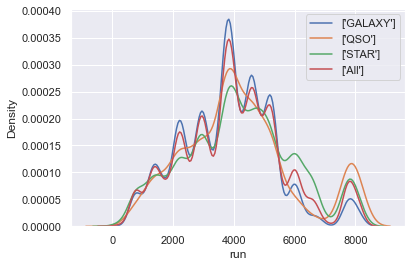

In [40]:
plot("run")

There is no significant difference in distribution by class, we can drop this column.

In [41]:
df_astro = df_astro.drop("run",axis=1)

#### **field**
Field number to identify each field

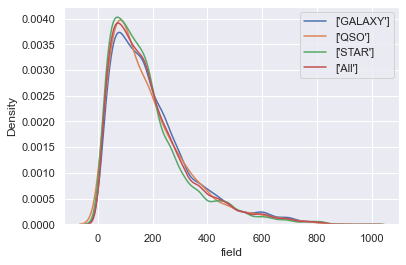

In [42]:
plot("field")

There is no significant difference in distribution by class,we can drop this column.

In [43]:
df_astro = df_astro.drop("field",axis=1)

We can see that the overall distribution has a distinct characteristic.

#### **redshift**
redshift value based on the increase in wavelength

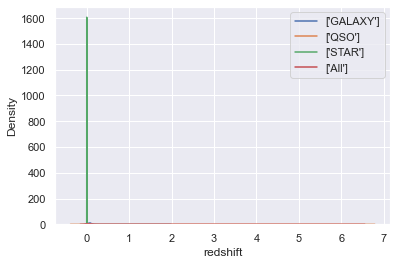

In [44]:
plot("redshift")

It is difficult to check the graph due to extreme values, so let's apply the log.

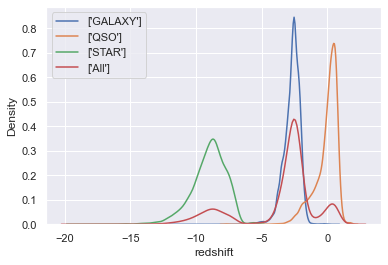

In [45]:
log_plot("redshift")

We can see that the overall distribution is characterized.

#### **plate**
plate ID, identifies each plate in SDSS

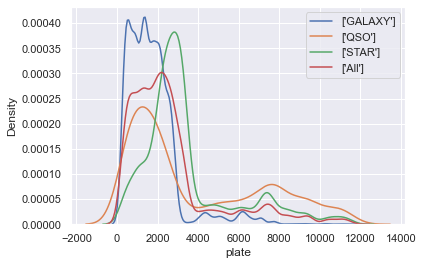

In [47]:
plot("plate")

We can see that the overall distribution has a distinct characteristic.

#### **mjd**
Modified Julian Date, used to indicate when a given piece of SDSS data was taken

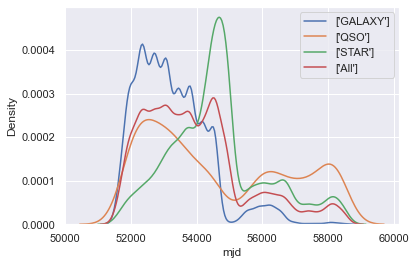

In [48]:
plot("mjd")

We can see that the overall distribution has a distinct characteristic.

#### **fiberid**
fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

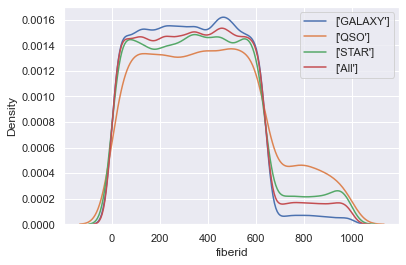

In [49]:
plot("fiberid")

There is no significant difference in distribution by class. We can drop this column.

#### **camcol**
Camera column to identify the scanline within the run

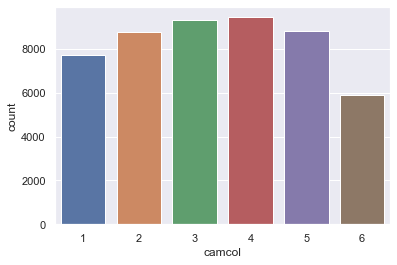

In [51]:
sns.countplot(x=df_astro["camcol"]);

We can see that cam_col is distributed evenly.

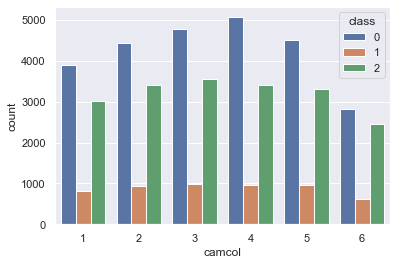

In [52]:
sns.countplot(x=df_astro["camcol"],hue=df_astro["class"]);

It seems difficult to distinguish the class according to cam_col, we can drop this column.

In [53]:
df_astro = df_astro.drop("camcol",axis=1)

#### **class**
object class (galaxy, star or quasar object)

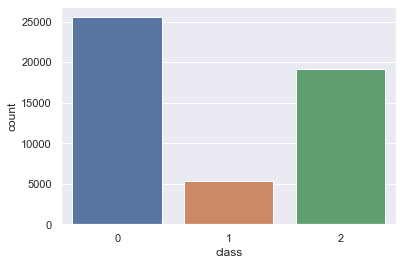

In [54]:
sns.countplot(x=df_astro["class"]);

We can see that the distribution of class is unbalanced.

### **Multivariate Analysis**
**Pairwise Correlation**

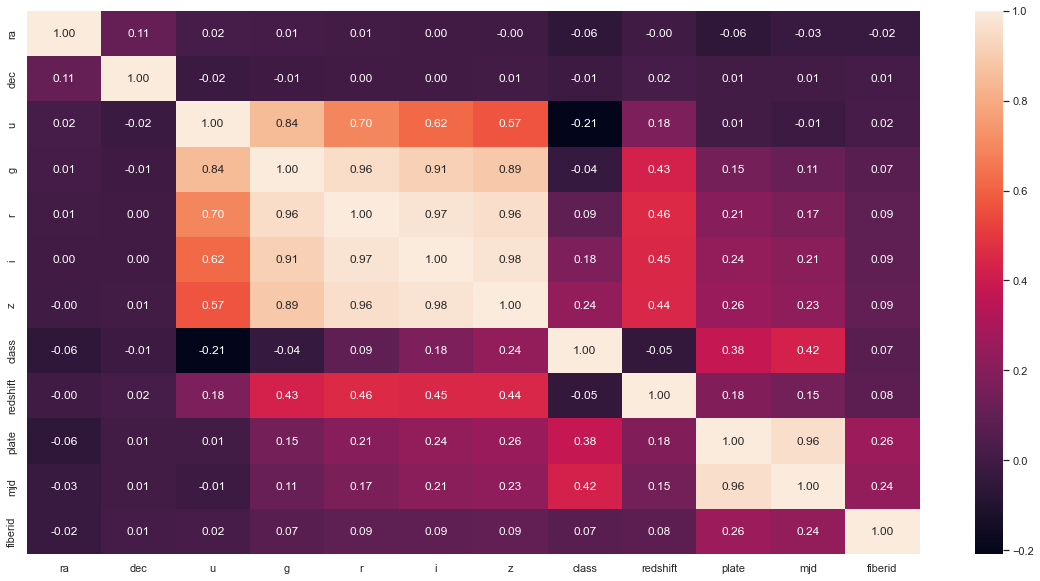

In [55]:
plt.figure(figsize=(20,10))
sns.heatmap(df_astro.corr(),annot=True,fmt=".2f")
plt.show()

**Observations:**
- We can see a **high positive correlation** among the following variables: 
    1. z and g
    2. mjd and plate
    3. z and r
    4. z and i
    5. i and g
    6. i and r
    7. r and g

<br/>   

- We can see a **high negative correlation** among the following variables:
    1. fiberid and ra
    2. mjd and ra
    3. mjd and u
    4. plate and ra
    5. redshift and class 

<br/>  
- The ra, dec, u, g and redshift are highly negatively correlated with target (class)
- The i and g are highly correlated, g and r are highly correlated and r and z are highly correlated.
- There is a negative correlation between redshift and class variables. The **redshift** is clearly going to be a highly influential feature in determining the class of the celestial object.


## **Data Preparation**